In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

print('Import Successful.')

Import Successful.


In [10]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('data.csv', names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [11]:
df.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


In [12]:
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (5000, 8)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


count     5000.000000
mean     13906.638600
std       1020.774876
min      11263.000000
25%      13197.750000
50%      13893.500000
75%      14614.000000
max      16964.000000
Name: price, dtype: float64


<ipython-input-19-fd2a067177b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4});


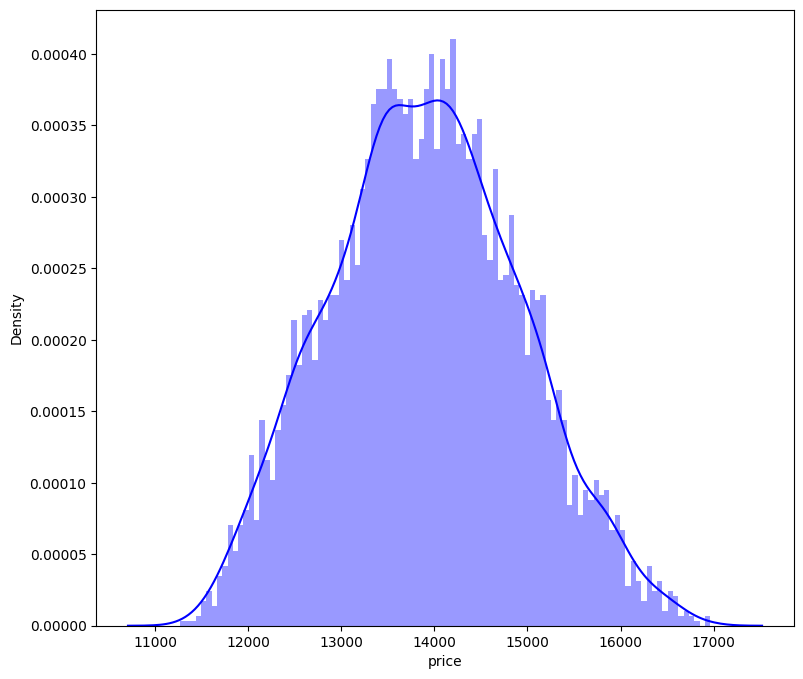

In [19]:
# House Price Distribution
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [20]:
# Numerical data distribution
list(set(df.dtypes.tolist()))

[dtype('int64')]

In [21]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


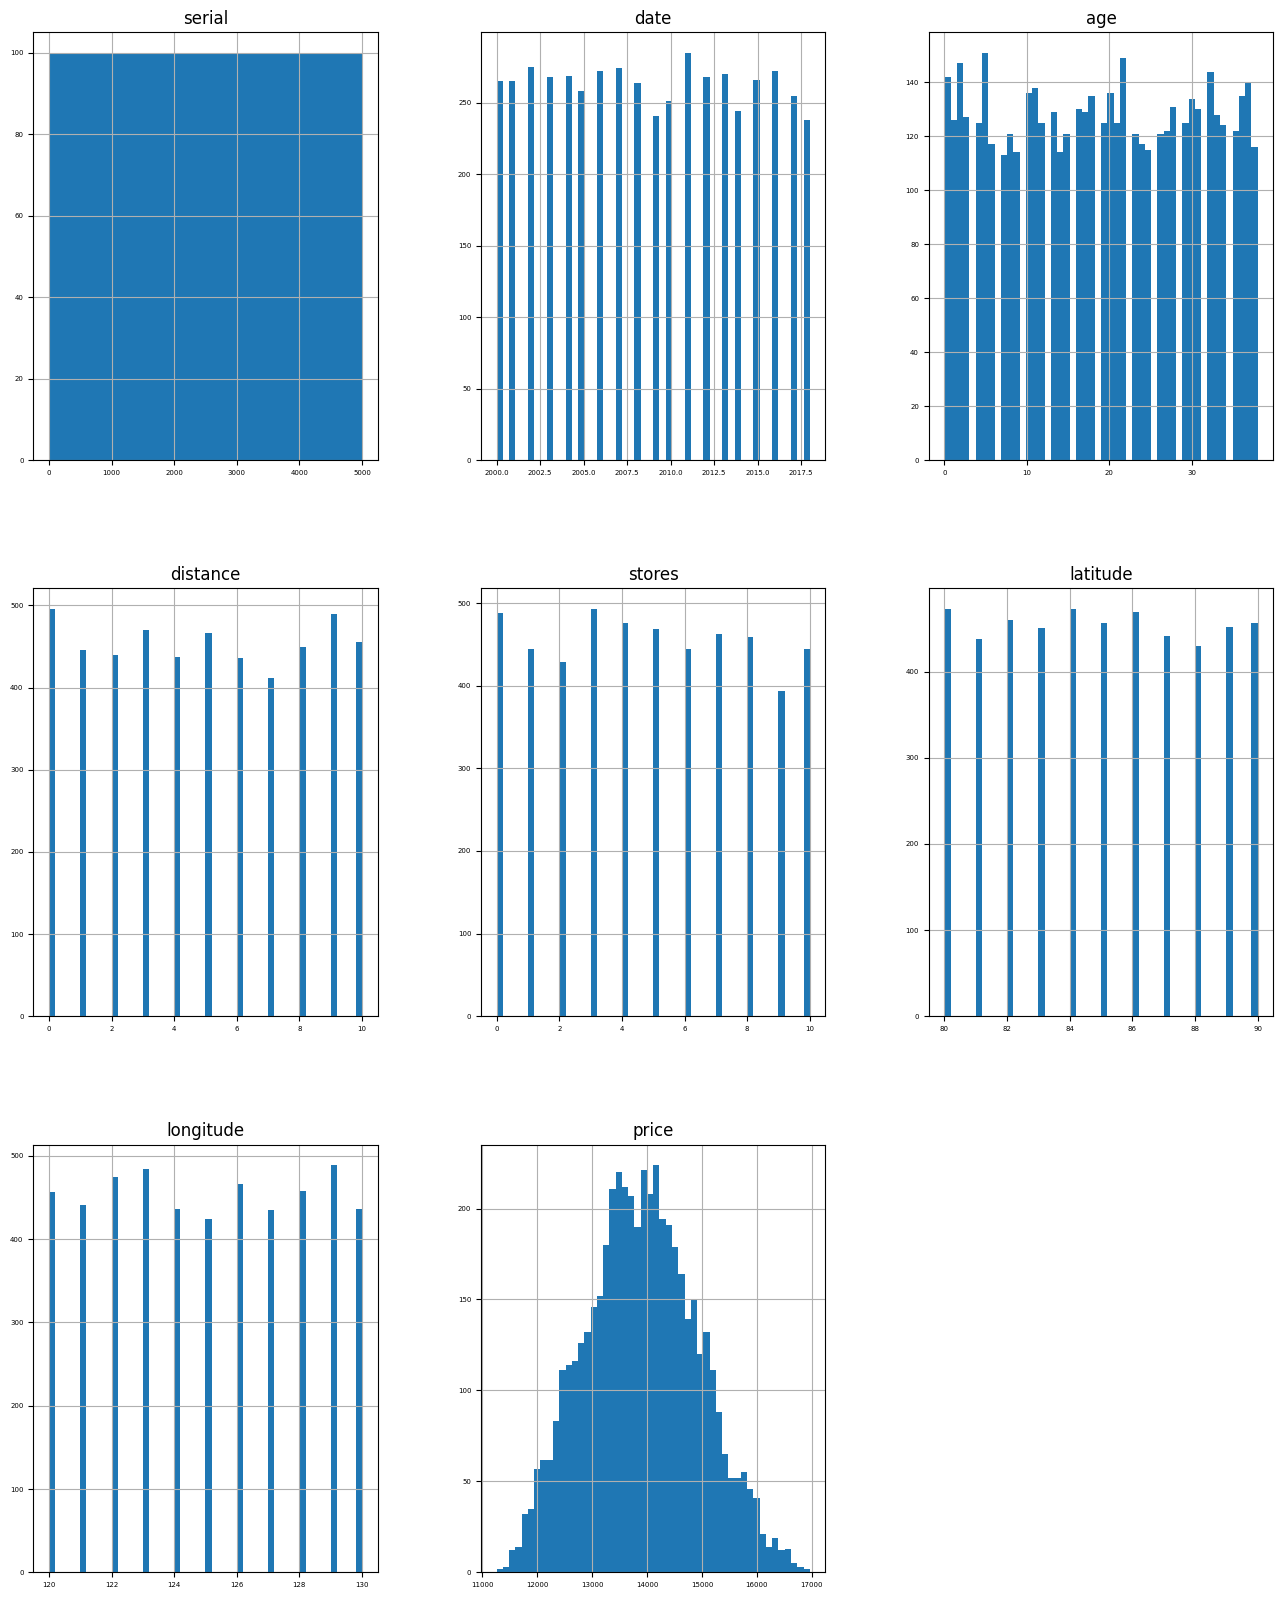

In [23]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=5, ylabelsize=5);

In [24]:
# Check Missing Data
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [25]:
# Data Normalization

df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [26]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value (y_pred):
    return int((y_pred*y_mean)/y_std)

In [27]:
# Create Training and Test Sets
x = df_norm.iloc[: , :5]
x.head()

,date,age,distance,stores,latitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301
2,1.298598,-0.083410,-0.618094,0.663402,1.590328
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238
4,0.932135,0.534444,0.006938,0.981581,-1.255981


In [28]:
y = df_norm.iloc[: ,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [29]:
x_arr = x.values
y_arr = y.values

print('features array :',x_arr)
print('label array : ',y_arr)

features array : [[ 0.01597778  0.18138426  1.25700164  0.34522379 -0.30721158]
 [-0.35048517 -1.31911814 -0.93060999 -0.60931203  0.32530146]
 [ 1.29859812 -0.08341028 -0.61809404  0.66340239  1.59032754]
 ...
 [ 1.4818296  -1.14258845  1.56951759  0.02704518  1.59032754]
 [ 0.19920926  1.59362182 -0.61809404  0.02704518 -1.25598114]
 [ 1.66506107 -0.87779391 -1.24312594  1.2997596   1.59032754]]
label array :  [ 0.35008836 -1.83648583 -0.33958379 ...  0.19138539  0.39809111
 -1.11350566]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_arr,y_arr, test_size=0.05, random_state=0)

print('train shape', x_train.shape, y_train.shape)
print('test shape', x_test.shape, y_test.shape)

train shape (4750, 5) (4750,)
test shape (250, 5) (250,)


In [31]:
def get_model ():
    model = Sequential([
        Dense(10, input_shape=(5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss = 'mse',
        optimizer = 'adam'
    )

    return model


get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Training the Model

es_cb = EarlyStopping(monitor='val_loss', patience=5)

model = get_model()

preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50,
    callbacks = [es_cb]

)

8/8 [==============================] - 0s 2ms/step
Epoch 1/50
149/149 [==============================] - 1s 4ms/step - loss: 0.7265 - val_loss: 0.2887
Epoch 2/50
149/149 [==============================] - 0s 2ms/step - loss: 0.2433 - val_loss: 0.1853
Epoch 3/50
149/149 [==============================] - 1s 4ms/step - loss: 0.1884 - val_loss: 0.1678
Epoch 4/50
149/149 [==============================] - 1s 7ms/step - loss: 0.1741 - val_loss: 0.1588
Epoch 5/50
149/149 [==============================] - 1s 5ms/step - loss: 0.1688 - val_loss: 0.1572
Epoch 6/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1657 - val_loss: 0.1606
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1637 - val_loss: 0.1666
Epoch 8/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1627 - val_loss: 0.1620
Epoch 9/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1602 - val_loss: 0.1563
Epoch 10/50
149/149 [============================

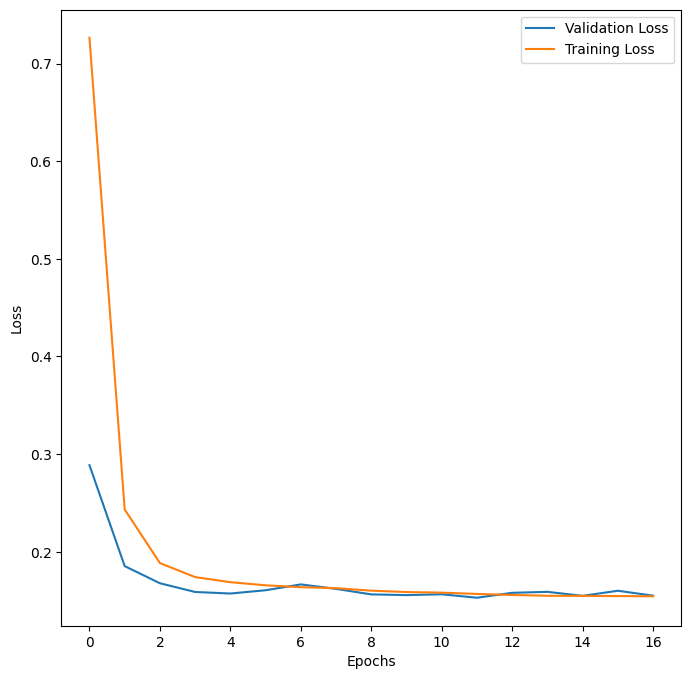

In [33]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

### Predictions

8/8 [==============================] - 0s 4ms/step


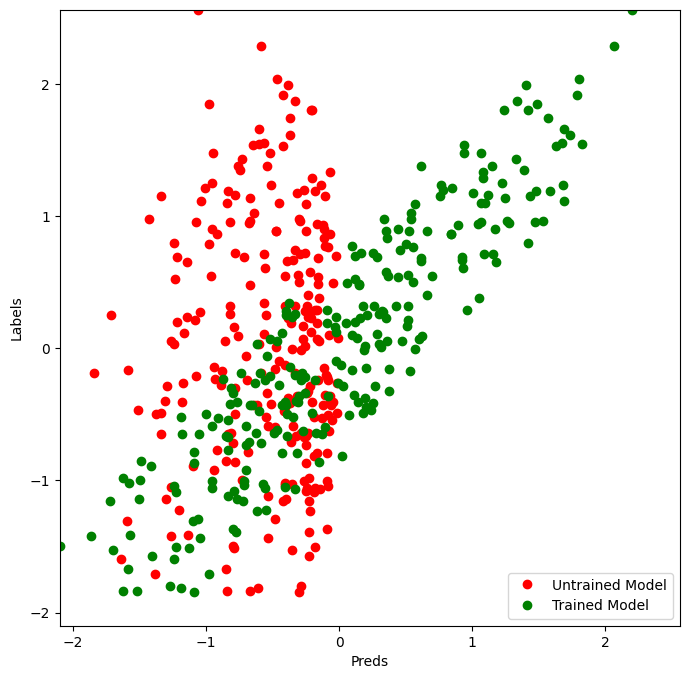

In [37]:
preds_on_trained = model.predict(x_test)


def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')

    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))

    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.legend()
    plt.show()
    return

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

<ipython-input-26-2fd116f5aa87>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int((y_pred*y_mean)/y_std)


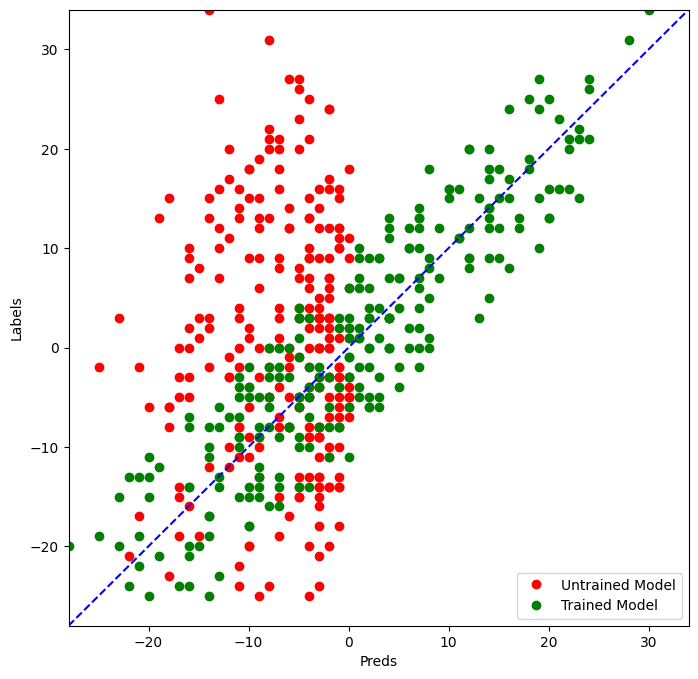

In [38]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
prince_test = [convert_label_value(y) for y in y_test]

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')

    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))

    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(price_untrained, price_trained, prince_test)